In [1]:
import cv2
import codecs

def get_int(b):
    return int(codecs.encode(b, 'hex'), 16)


def parse_byte(b):
    if isinstance(b, str):
        return ord(b)
    return b

def read_label_file(path):
    with open(path, 'rb') as f:
        data = f.read()
        assert get_int(data[:4]) == 2049
        length = get_int(data[4:8])
        labels = [parse_byte(b) for b in data[8:]]
        assert len(labels) == length
        return labels


def read_image_file(path):
    with open(path, 'rb') as f:
        data = f.read()
        assert get_int(data[:4]) == 2051
        length = get_int(data[4:8])
        num_rows = get_int(data[8:12])
        num_cols = get_int(data[12:16])
        images = []
        idx = 16
        for l in range(length):
            img = []
            images.append(img)
            for r in range(num_rows):
                row = []
                img.append(row)
                for c in range(num_cols):
                    row.append(parse_byte(data[idx]))
                    idx += 1
        assert len(images) == length
        return images

    
def showdigit(img, time):
    cv2.imshow('digit', img)
    cv2.waitKey(time)
    cv2.destroyWindow('digit')  
    
# def plotdigit(img):
#     plt.plot()

In [2]:
from os.path import join

datadir = 'data'
train_data_file = 'train-images-idx3-ubyte'
train_label_file = 'train-labels-idx1-ubyte'
test_data_file = 't10k-images-idx3-ubyte'
test_label_file = 't10k-labels-idx1-ubyte'

train_data = read_image_file(join(datadir, train_data_file))
train_label = read_label_file(join(datadir, train_label_file))

In [51]:
import numpy as np

print type(train_data), len(train_data), type(train_data[0]), len(train_data[0])
print type(train_label), len(train_label), type(train_label[0])

img = np.array(train_data[0],dtype=np.uint8)
print train_label[0]


<type 'list'> 60000 <type 'list'> 28
<type 'list'> 60000 <type 'int'>
5


In [67]:
def warpimg(img, warpvec):
    # warpvec: [a, b, c, d, e, f, c1, c2]
    # [ 1+a,    b,      e*10  
    #   c,      1+d,    f*10
    #   c1/100, c2/100, 1]
    M = np.array([[1+warpvec[0], warpvec[1], warpvec[4]*10.0],
                  [warpvec[2], 1+warpvec[3], warpvec[5]*10.0],
                  [warpvec[6]/100.0, warpvec[7]/100.0,    1]])
    dst = cv2.warpPerspective(img,M,(28,28))
    return dst

[[ 1.    0.    0.  ]
 [ 0.    1.    0.  ]
 [ 0.01  0.    1.  ]]
uint8 (28, 28) uint8 (28, 28)


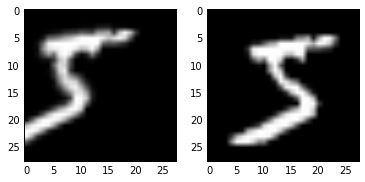

In [86]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=5, suppress=True)

# img = np.zeros((28,28),dtype=np.uint8)
# img[8:20,8:20] = 255
M = np.array([[1, 0, -0],
              [-0, 1,    0],
              [0.01, 0.0,    1]])
print M

dst = cv2.warpPerspective(img,M,(28,28))
dst = warpimg(img, [0.2,-0.5,0.08,0.2,-0.2,-0.3,0.8,0])
print dst.dtype,dst.shape, img.dtype, img.shape
# print dst
ax1 = plt.subplot(121)
ax1.imshow(dst, cmap='gray')
ax2 = plt.subplot(122)
ax2.imshow(img, cmap='gray')
plt.show()
# showdigit(dst,0)

In [5]:
from torchvision import datasets, transforms


kwargs = {'num_workers': 1, 'pin_memory': True} 

mnistData = datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
#                        transforms.Normalize((0.1307,), (0.3081,))
                   ]))
mnistTestData = datasets.MNIST('../data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
#                        transforms.Normalize((0.1307,), (0.3081,))
                   ]))

In [10]:
print len(mnistData)
print len(mnistTestData)
# print mnistData[0]
print type(mnistData), len(mnistData)
print mnistData[0][0].numpy().shape
print type(mnistData[0][0]), type(mnistData[0][1])

60000
10000
<class 'torchvision.datasets.mnist.MNIST'> 60000
<class 'torch.ByteTensor'>
(1, 28, 28)
<class 'torch.ByteTensor'>
<class 'torch.FloatTensor'><class 'torch.ByteTensor'>
 <type 'int'>
